In [159]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [160]:
data = pd.read_csv("./digit_data.csv")

In [161]:
data.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [162]:
data.iloc[1, 1:]

pixel0      0
pixel1      0
pixel2      0
pixel3      0
pixel4      0
           ..
pixel779    0
pixel780    0
pixel781    0
pixel782    0
pixel783    0
Name: 1, Length: 784, dtype: int64

In [163]:
np.array(data.iloc[1, 1:]).reshape((28,28))

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  18,  30, 137,
        137, 192,  86,  72,   1,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,  13,  86, 250, 254, 254,
        254, 254, 217, 246, 151,  32,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  

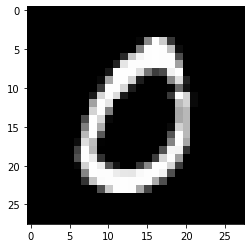

In [164]:
plt.imshow(np.array(data.iloc[int(np.random.random() * data.shape[0]), 1:]).reshape((28,28)), cmap="gray")

In [165]:
data = np.array(data)
m, n = data.shape

In [166]:
m,n

(42000, 785)

In [167]:
np.random.shuffle(data)

In [186]:
data_test = data[:1000].T
test_y = data_test[0]
test_x = data_test[1:n]

In [187]:
data_train = data[1000:].T
train_y = data_train[0]
train_x = data_train[1:n]

In [188]:
np.random.seed(0)

In [189]:
class Layer_Dense:
    def __init__(self, n_inputs, n_neurons):

        # self.weights = np.random.randn(n_inputs, n_neurons)
        self.weights = np.random.random((n_inputs, n_neurons)) - 0.5

        # self.biases = np.zeros(1, n_neurons)
        self.biases = np.random.random((1, n_neurons)) - 0.5

    def forward(self, inputs):
        self.output = np.dot(inputs, self.weights)  + self.biases

In [234]:
class Activations:

    def ReLU(self, inputs):
        return np.maximum(0, inputs)

    def ReLU_derivative(self, inputs):
        return (inputs > 0) * 1
            
    def Sigmoid(self, inputs):
        return (1 / 1 + np.exp(-inputs))
        
    def Sigmoid_derivative(self, inputs):
        return (1 / 1 + np.exp(-inputs))*(1- (1 / 1 + np.exp(-inputs)))

    def SoftMax(self, inputs):
        return np.exp(inputs)/ np.sum(np.exp(inputs))

    def SoftMax_derivative(self):
        raise NotImplementedError

In [235]:
# def ReLU(val, derivative = False):
#     if derivative == False:
#         return np.maximum(0, val)

In [236]:
activation = Activations()

In [237]:
layer1 = Layer_Dense(784, 10)
layer2 = Layer_Dense(10, 2)

In [238]:
train_x[:,0].shape

(784,)

In [239]:
train_x[:,0:2].shape

(784, 2)

In [240]:
layer1.forward(train_x[:,0:2].T)

In [241]:
layer1.output

array([[ -209.80565422,   143.26243944,   324.18007662,  -510.11454353,
          259.52924425,  -193.26960288,   479.9943076 ,  -103.9166169 ,
         -876.31383248,  -186.11119027],
       [  908.71987437,  -341.69498731,   688.79585467,  -651.80205335,
         1177.53147743,   208.56922409,  1539.4615429 ,  -437.53082377,
        -1052.22950501,  -341.54325579]])

In [242]:
layer1.output[0]

array([-209.80565422,  143.26243944,  324.18007662, -510.11454353,
        259.52924425, -193.26960288,  479.9943076 , -103.9166169 ,
       -876.31383248, -186.11119027])

In [243]:
activation1 = activation.ReLU(layer1.output)

In [244]:
activation1

array([[   0.        ,  143.26243944,  324.18007662,    0.        ,
         259.52924425,    0.        ,  479.9943076 ,    0.        ,
           0.        ,    0.        ],
       [ 908.71987437,    0.        ,  688.79585467,    0.        ,
        1177.53147743,  208.56922409, 1539.4615429 ,    0.        ,
           0.        ,    0.        ]])

In [245]:
layer2.forward(activation1)

In [246]:
layer2.output

array([[ 152.60912956, -222.31277237],
       [ 122.20141528, -866.1942857 ]])